In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [23]:
data = pd.read_csv("RNA-BN.csv")
#data = pd.read_table("RNALevelDownUpBN.txt", sep='\t')
#print(data)

first = 'downratio'
second = 'upratio'
third = 'p'
# first = 'down'
# second = 'up'
# data_type = 'num'

paintdata_p = []
paintdata_n = []
pvalue = []

#celllines = ['MII', 'zygote', 'early', '2cell', '4cell', '8cell', 'ICM']
celllines = ['zygote', 'early', '2cell', '4cell', '8cell', 'ICM', 'mESC']

for cell in celllines:
    p = data.loc[(data['Cellline']==cell)][first].values[0]
    n = data.loc[(data['Cellline']==cell)][second].values[0]
    pv = data.loc[(data['Cellline']==cell)][third].values[0]
#     p = data.loc[(data['stage']==cell) & (data['type'] == first)][data_type].values
#     n = data.loc[(data['stage']==cell) & (data['type'] == second)][data_type].values
#     stat, pv = stats.ttest_ind(p,n, equal_var = False)
    pvalue.append(round(pv,2))
    paintdata_p.append(p)
#     paintdata_p.append(p.sum())
    paintdata_n.append(n)
#     paintdata_n.append(n.sum())
    

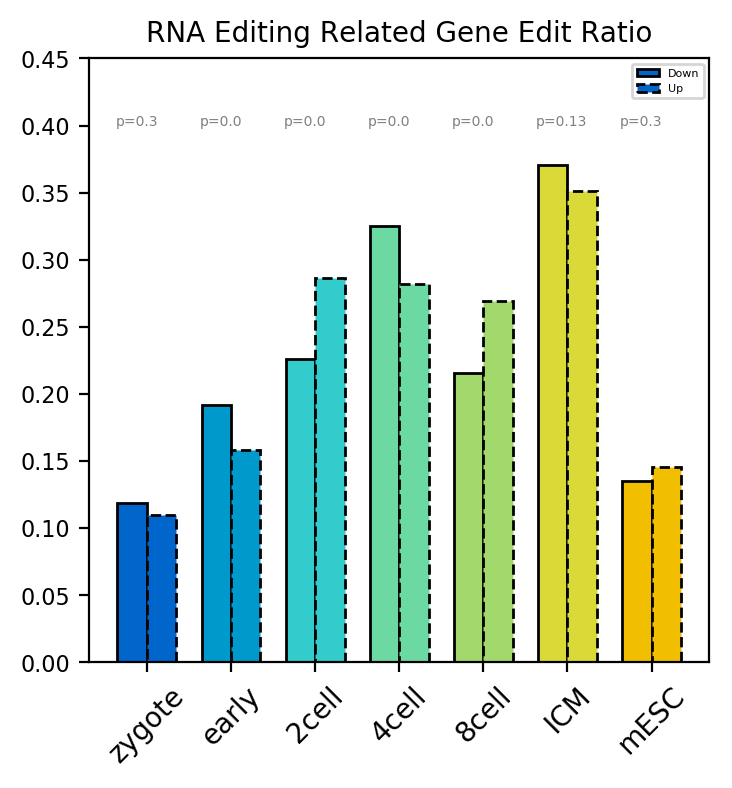

In [24]:
plen = len(paintdata_p)
n_groups = plen
index = np.arange(n_groups)
bar_width = 0.35

#colorBar1 =[[0,0.2,0.8],[0.0,0.4,0.8],[0.0,0.6,0.8],[0.2,0.8,0.8],[0.425,0.85,0.6375],[0.6375,0.85,0.425],[0.85,0.85,0.22125]]
colorBar1 =[[0.0,0.4,0.8],[0.0,0.6,0.8],[0.2,0.8,0.8],[0.425,0.85,0.6375],[0.6375,0.85,0.425],[0.85,0.85,0.22125],[0.95,0.75,0.0]]

plt.figure(figsize=(4, 4), dpi=200)

bp1 = plt.bar(index, paintdata_p, width = bar_width, facecolor = 'lightskyblue', edgecolor = 'black', label='Down')

for patch, color in zip(bp1, colorBar1):
    patch.set_facecolor(color)
bp2 = plt.bar(index+bar_width, paintdata_n, width = bar_width, facecolor = 'yellowgreen',edgecolor = 'black', linestyle='--', label='Up')
for patch, color in zip(bp2, colorBar1):
    patch.set_facecolor(color)
    
style=dict(size=5, color='gray')
for i in index:
    plt.text(i-0.2, 0.4,"p="+str(pvalue[i]), **style)
plt.xticks(index+bar_width/2, celllines, rotation = 45) 
plt.yticks(fontsize=8)
plt.ylim(0, 0.45)
plt.title('RNA Editing Related Gene Edit Ratio', fontsize=10)
plt.legend(prop={'size':4})
plt.savefig('RNAdownupratioBN.png')